In [ ]:
import os 
import pandas as pd
import cv2 as cv2
import matplotlib.pyplot as plt

# image_path = '/content/drive/MyDrive/Deep learning/Proyecto_1/tiny-imagenet-200'
image_path = './tiny-imagenet-200'

In [28]:
def read_file(file_path):
    """
    Reads a .txt file where each row is identified by the fourth separator '\t'.
    
    Parameters:
    file_path (str): The path to the .txt file.
    
    Returns:
    list: A list of lists where each inner list represents a row of the .txt file.
    """
    rows = []
    with open(file_path, 'r') as file:
        for line in file:
            # Remove the '\n' character from the end of the line
            line = line.rstrip('\n')
            # Split each line by '\t' delimiter
            row = line.split('\t')
            rows.append(row)
    return rows

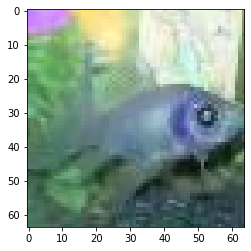

In [109]:
una_imagen = cv2.imread(os.path.join(image_path, 'train/n01443537/images/n01443537_0.JPEG'))
plt.imshow(una_imagen)

In [ ]:
una_bbox = read_file('./tiny-imagenet-200/train/n01443537/n01443537_boxes.txt')
una_bbox

In [118]:
def draw_bbox_on_image(image, bbox):
    """
    Draws a bounding box on an image using the provided coordinates.
    
    Parameters:
    image (numpy.ndarray): The image to draw the bounding box on.
    bbox (list): A list of four integers representing the bounding box coordinates in the format [x_min, y_min, x_max, y_max].
    
    Returns:
    numpy.ndarray: The image with the bounding box drawn on it.
    """
    # Convert bbox coordinates to integers
    bbox = [int(coord) for coord in bbox]
    # Draw the bounding box on the image
    image_with_bbox = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)
    return image_with_bbox

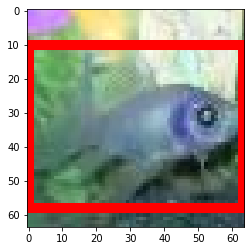

In [119]:
plt.imshow(draw_bbox_on_image(una_imagen, una_bbox[0][1:]))

# Using Class for Data Generation

In [1]:
from utils import DataPreparator

In [2]:
data = DataPreparator('./tiny-imagenet-200/train/', './tiny-imagenet-200/val/', './tiny-imagenet-200/test/')
train_data, val_data, test_data = data.returnData()

In [3]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), (TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None)))>

In [4]:
val_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), (TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None)))>

In [5]:
test_data

<PrefetchDataset element_spec=TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None)>

In [ ]:
#TODO: Queda pendiente hacer lo de las metricas y el modelo, ya esta lista la generación de los tensores para los datasets